## Customer Segmentation Analysis for Marketing Campaign

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

warnings.filterwarnings("ignore")

### Importing and Transforming Dataset

The information used in the dataset was obtained from <a href="https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis">Customer Personality Analysis</a> in Kaggle, which contains records of personal and financial information, behavior and purchasing patterns of different types of customers. 

In [2]:
customer_info_df = pd.read_csv('./Dataset/Marketing Campaign.csv', delimiter='\t')
customer_info_df.head(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [3]:
# Rename the columns for uniformity
columns_new_name = {"MntWines" : "Wines", "MntFruits" : "Fruits", "MntMeatProducts" : "Meat", "MntFishProducts" : "Fish", "MntSweetProducts" : "Sweets", "MntGoldProds" : "Gold"}
customer_info_df = customer_info_df.rename(columns=columns_new_name)
customer_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   Wines                2240 non-null   int64  
 10  Fruits               2240 non-null   int64  
 11  Meat                 2240 non-null   int64  
 12  Fish                 2240 non-null   int64  
 13  Sweets               2240 non-null   int64  
 14  Gold                 2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

From the above ouput, we can conclude and note that:
- There are missing values in `Income`
- Variable `Dt_Customer`, which indicates the date on which the customer signed up with the company, is not in DateTime format.
- There are some categorical features, which needs to be converted into numerical format

There are 24 records with missing values in `Income`. Suppose that these customers do not have a job at the moment, which means that their income is considered to be zero (0).

In [4]:
customer_info_df = customer_info_df.fillna(0)
print(f"Number of missing values for income: {customer_info_df['Income'].isna().sum()}")

Number of missing values for income: 0


Drop unnecessary features from the dataset

In [5]:
customer_info_df = customer_info_df.drop(columns=['ID', 'Z_CostContact', 'Z_Revenue'])
customer_info_df.columns

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

### Exploratory Data Analysis

View the descriptive statistics for `Year_Birth`, `Income`, `Kidhome` and `Teenhome` variables

In [6]:
customer_info_df[['Year_Birth', 'Income', 'Kidhome', 'Teenhome']].describe()

Year_Birth         Income      Kidhome     Teenhome
count  2240.000000    2240.000000  2240.000000  2240.000000
mean   1968.805804   51687.459375     0.444196     0.506250
std      11.984069   25609.342730     0.538398     0.544538
min    1893.000000       0.000000     0.000000     0.000000
25%    1959.000000   34722.000000     0.000000     0.000000
50%    1970.000000   51075.000000     0.000000     0.000000
75%    1977.000000   68289.750000     1.000000     1.000000
max    1996.000000  666666.000000     2.000000     2.000000

Check for outliers in `Year_Birth` and `Income` variables using boxplot

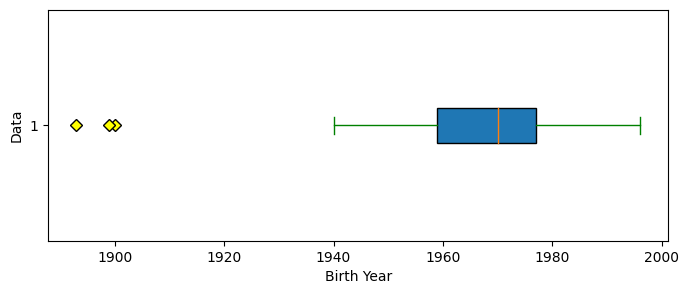

In [7]:
fig, ax = plt.subplots(figsize=(8,3))
ax.boxplot(customer_info_df['Year_Birth'], vert=False, patch_artist=True,
           capprops=dict(color='green'),
           whiskerprops=dict(color='green'),
           flierprops=dict(markerfacecolor='yellow', marker='D'))
ax.set_xlabel('Birth Year')
ax.set_ylabel('Data')
plt.show()

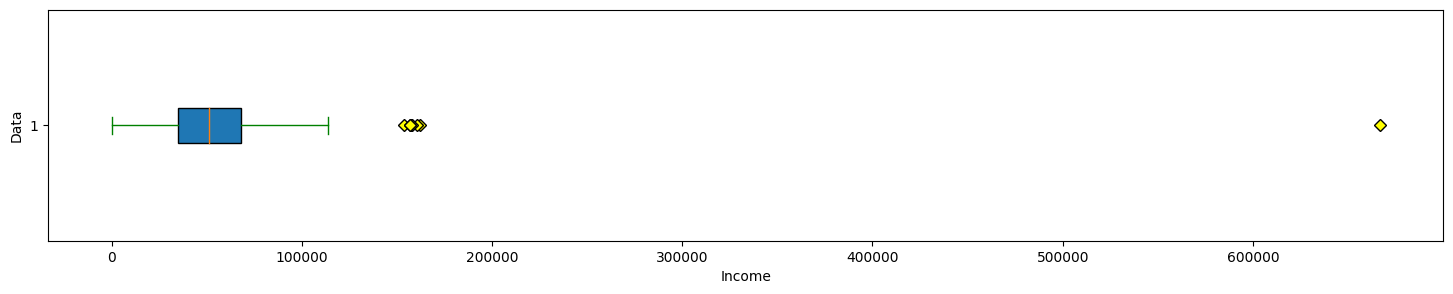

In [8]:
fig, ax = plt.subplots(figsize=(18,3))
ax.boxplot(customer_info_df['Income'], vert=False, patch_artist=True,
           capprops=dict(color='green'),
           whiskerprops=dict(color='green'),
           flierprops=dict(markerfacecolor='yellow', marker='D'))
ax.set_xlabel('Income')
ax.set_ylabel('Data')
plt.show()

The charts presented indicate that there are a small number of outliers present in the `Income` and `Year_Birth` variables. To address this issue, we will remove outliers in the `Year_Birth` variable since having an age difference greater than 100 years between the minimum and maximum values is not realistic. However, we will only remove the most extreme `Income` outlier while retaining the other data points.

In [9]:
print(f'No. of records (before): {customer_info_df.shape[0]}')

# Remove the outliers
customer_info_df = customer_info_df[(customer_info_df['Year_Birth'] > 1930)]
customer_info_df = customer_info_df[(customer_info_df['Income'] < 600000)]
customer_info_df.reset_index(drop=True)

print(f'No. of records (after): {customer_info_df.shape[0]}')

No. of records (before): 2240
No. of records (after): 2236


Calculate the age of the customers by getting the difference between the year dataset was uploaded in Kaggle (i.e. 2021) and the year of their birth.

In [10]:
customer_info_df['Age'] = 2021 - customer_info_df['Year_Birth']
customer_info_df = customer_info_df.drop(columns=['Year_Birth'], axis=1)
customer_info_df['Age'].describe()

count    2236.000000
mean       52.101968
std        11.703281
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max        81.000000
Name: Age, dtype: float64

Create a `Children` feature to indicate the total number of children in the household, i.e. combining `KidHome` and `Teenhome`

<AxesSubplot: xlabel='Children', ylabel='count'>

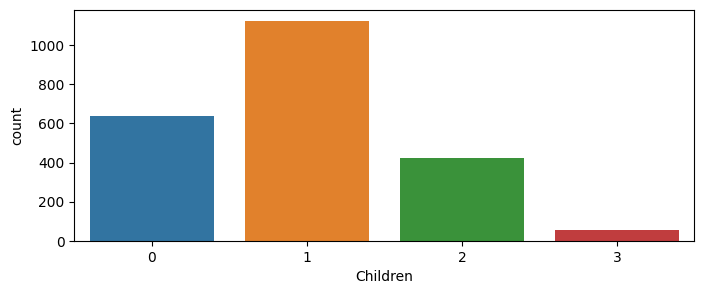

In [11]:
customer_info_df['Children'] = customer_info_df['Kidhome'] + customer_info_df['Teenhome']

customer_info_df = customer_info_df.drop(columns=['Kidhome', 'Teenhome'], axis=1)

plt.figure(figsize = (8,3))
sns.countplot(data=customer_info_df, x="Children")

Get quick insight of other personal information regarding the customers

In [12]:
customer_info_colname = ["Education" , "Marital_Status"]

for info in customer_info_colname:
    print(f"\nFEATURE: {info}\n")
    print(customer_info_df[info].value_counts().sort_values(ascending=True))


FEATURE: Education

Basic           54
2n Cycle       201
Master         370
PhD            485
Graduation    1126
Name: Education, dtype: int64

FEATURE: Marital_Status

Absurd        2
YOLO          2
Alone         3
Widow        77
Divorced    231
Single      479
Together    578
Married     864
Name: Marital_Status, dtype: int64


Based from the results, the follow changes need to be done:
- Combine the categories "Alone", "Absurd", and "YOLO" with the "Single" marital status.
- Change the names of the categories "Basic", "Graduation", and "2n Cycle" to "Undergraduate", "Graduate", and "Master", respectively.

[Text(0.5, 0, 'Marital Status')]

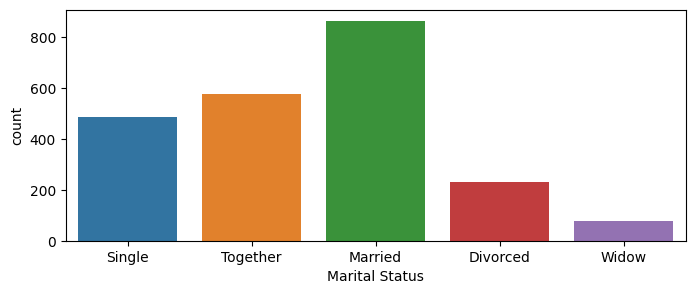

In [13]:
customer_info_df['Marital_Status'] = np.where(customer_info_df['Marital_Status'] == 'Alone', 'Single', customer_info_df['Marital_Status'])
customer_info_df['Marital_Status'] = np.where(customer_info_df['Marital_Status'] == 'Absurd', 'Single', customer_info_df['Marital_Status'])
customer_info_df['Marital_Status'] = np.where(customer_info_df['Marital_Status'] == 'YOLO', 'Single', customer_info_df['Marital_Status'])

plt.figure(figsize = (8,3))
ax = sns.countplot(data=customer_info_df, x="Marital_Status")
ax.set(xlabel="Marital Status")

<AxesSubplot: xlabel='Education', ylabel='count'>

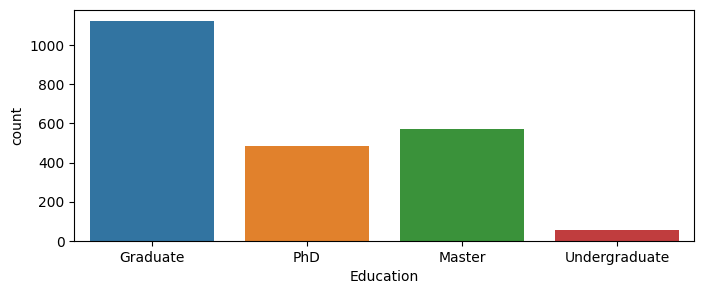

In [14]:
customer_info_df['Education'] = np.where(customer_info_df['Education'] == 'Basic', 'Undergraduate', customer_info_df['Education'])
customer_info_df['Education'] = np.where(customer_info_df['Education'] == 'Graduation', 'Graduate', customer_info_df['Education'])
customer_info_df['Education'] = np.where(customer_info_df['Education'] == '2n Cycle', 'Master', customer_info_df['Education'])

plt.figure(figsize = (8,3))
sns.countplot(data=customer_info_df, x="Education")

Generate a new attribute using the `Dt_Customer` variable that indicates the duration in days that a customer has been registered with the company. This duration will be calculated as the difference between the `Dt_Customer` value of the most recent customer in the dataset and the `Dt_Customer` value of each individual customer.

In [15]:
# Convert to data type to DateTime
customer_info_df["Dt_Customer"] = pd.to_datetime(customer_info_df["Dt_Customer"])

customer_info_df["Membership_Days"] = ((customer_info_df["Dt_Customer"].max()) - customer_info_df['Dt_Customer']).dt.days.astype('int')
customer_info_df = customer_info_df.drop(columns=['Dt_Customer'], axis=1)

customer_info_df["Membership_Days"].head(5)

0    971
1    125
2    472
3     65
4    321
Name: Membership_Days, dtype: int32

View summary statistics on the expenses made for individual products in last 2 years

In [16]:
customer_info_df[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']].describe()

Wines       Fruits         Meat         Fish       Sweets  \
count  2236.00000  2236.000000  2236.000000  2236.000000  2236.000000   
mean    304.12746    26.275939   166.983453    37.536225    27.080501   
std     336.59181    39.724007   225.689645    54.648562    41.299504   
min       0.00000     0.000000     0.000000     0.000000     0.000000   
25%      24.00000     1.000000    16.000000     3.000000     1.000000   
50%     174.00000     8.000000    67.000000    12.000000     8.000000   
75%     504.25000    33.000000   232.000000    50.000000    33.000000   
max    1493.00000   199.000000  1725.000000   259.000000   263.000000   

              Gold  
count  2236.000000  
mean     43.983005  
std      52.061568  
min       0.000000  
25%       9.000000  
50%      24.000000  
75%      56.000000  
max     362.000000

View summary statistics for the following variables: length of membership, number of days since the last purchase, accepted promotions, number of purchases made on each platform, and number of complaints.

In [17]:
customer_info_df[['Membership_Days', 'Recency', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 
                  'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']].describe()

Membership_Days      Recency  NumDealsPurchases  NumWebPurchases  \
count      2236.000000  2236.000000        2236.000000      2236.000000   
mean        512.179785    49.116279           2.326029         4.087657   
std         232.311073    28.957284           1.933032         2.779988   
min           0.000000     0.000000           0.000000         0.000000   
25%         340.750000    24.000000           1.000000         2.000000   
50%         513.000000    49.000000           2.000000         4.000000   
75%         686.000000    74.000000           3.000000         6.000000   
max        1063.000000    99.000000          15.000000        27.000000   

       NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
count          2236.000000        2236.000000        2236.000000   
mean              2.663238           5.795617           5.318873   
std               2.923898           3.251129           2.426886   
min               0.000000           0.000000           0.000000   
25%               0.000000           3.000000           3.000000   
50%               2.000000           5.000000           6.000000   
75%               4.000000           8.000000           7.000000   
max              28.000000          13.000000          20.000000   

       AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
count   2236.000000   2236.000000   2236.000000   2236.000000   2236.000000   
mean       0.064401      0.013417      0.072898      0.074687      0.072451   
std        0.245520      0.115077      0.260027      0.262944      0.259291   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          Response     Complain  
count  2236.000000  2236.000000  
mean      0.149374     0.008945  
std       0.356536     0.094173  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.000000     0.000000  
max       1.000000     1.000000

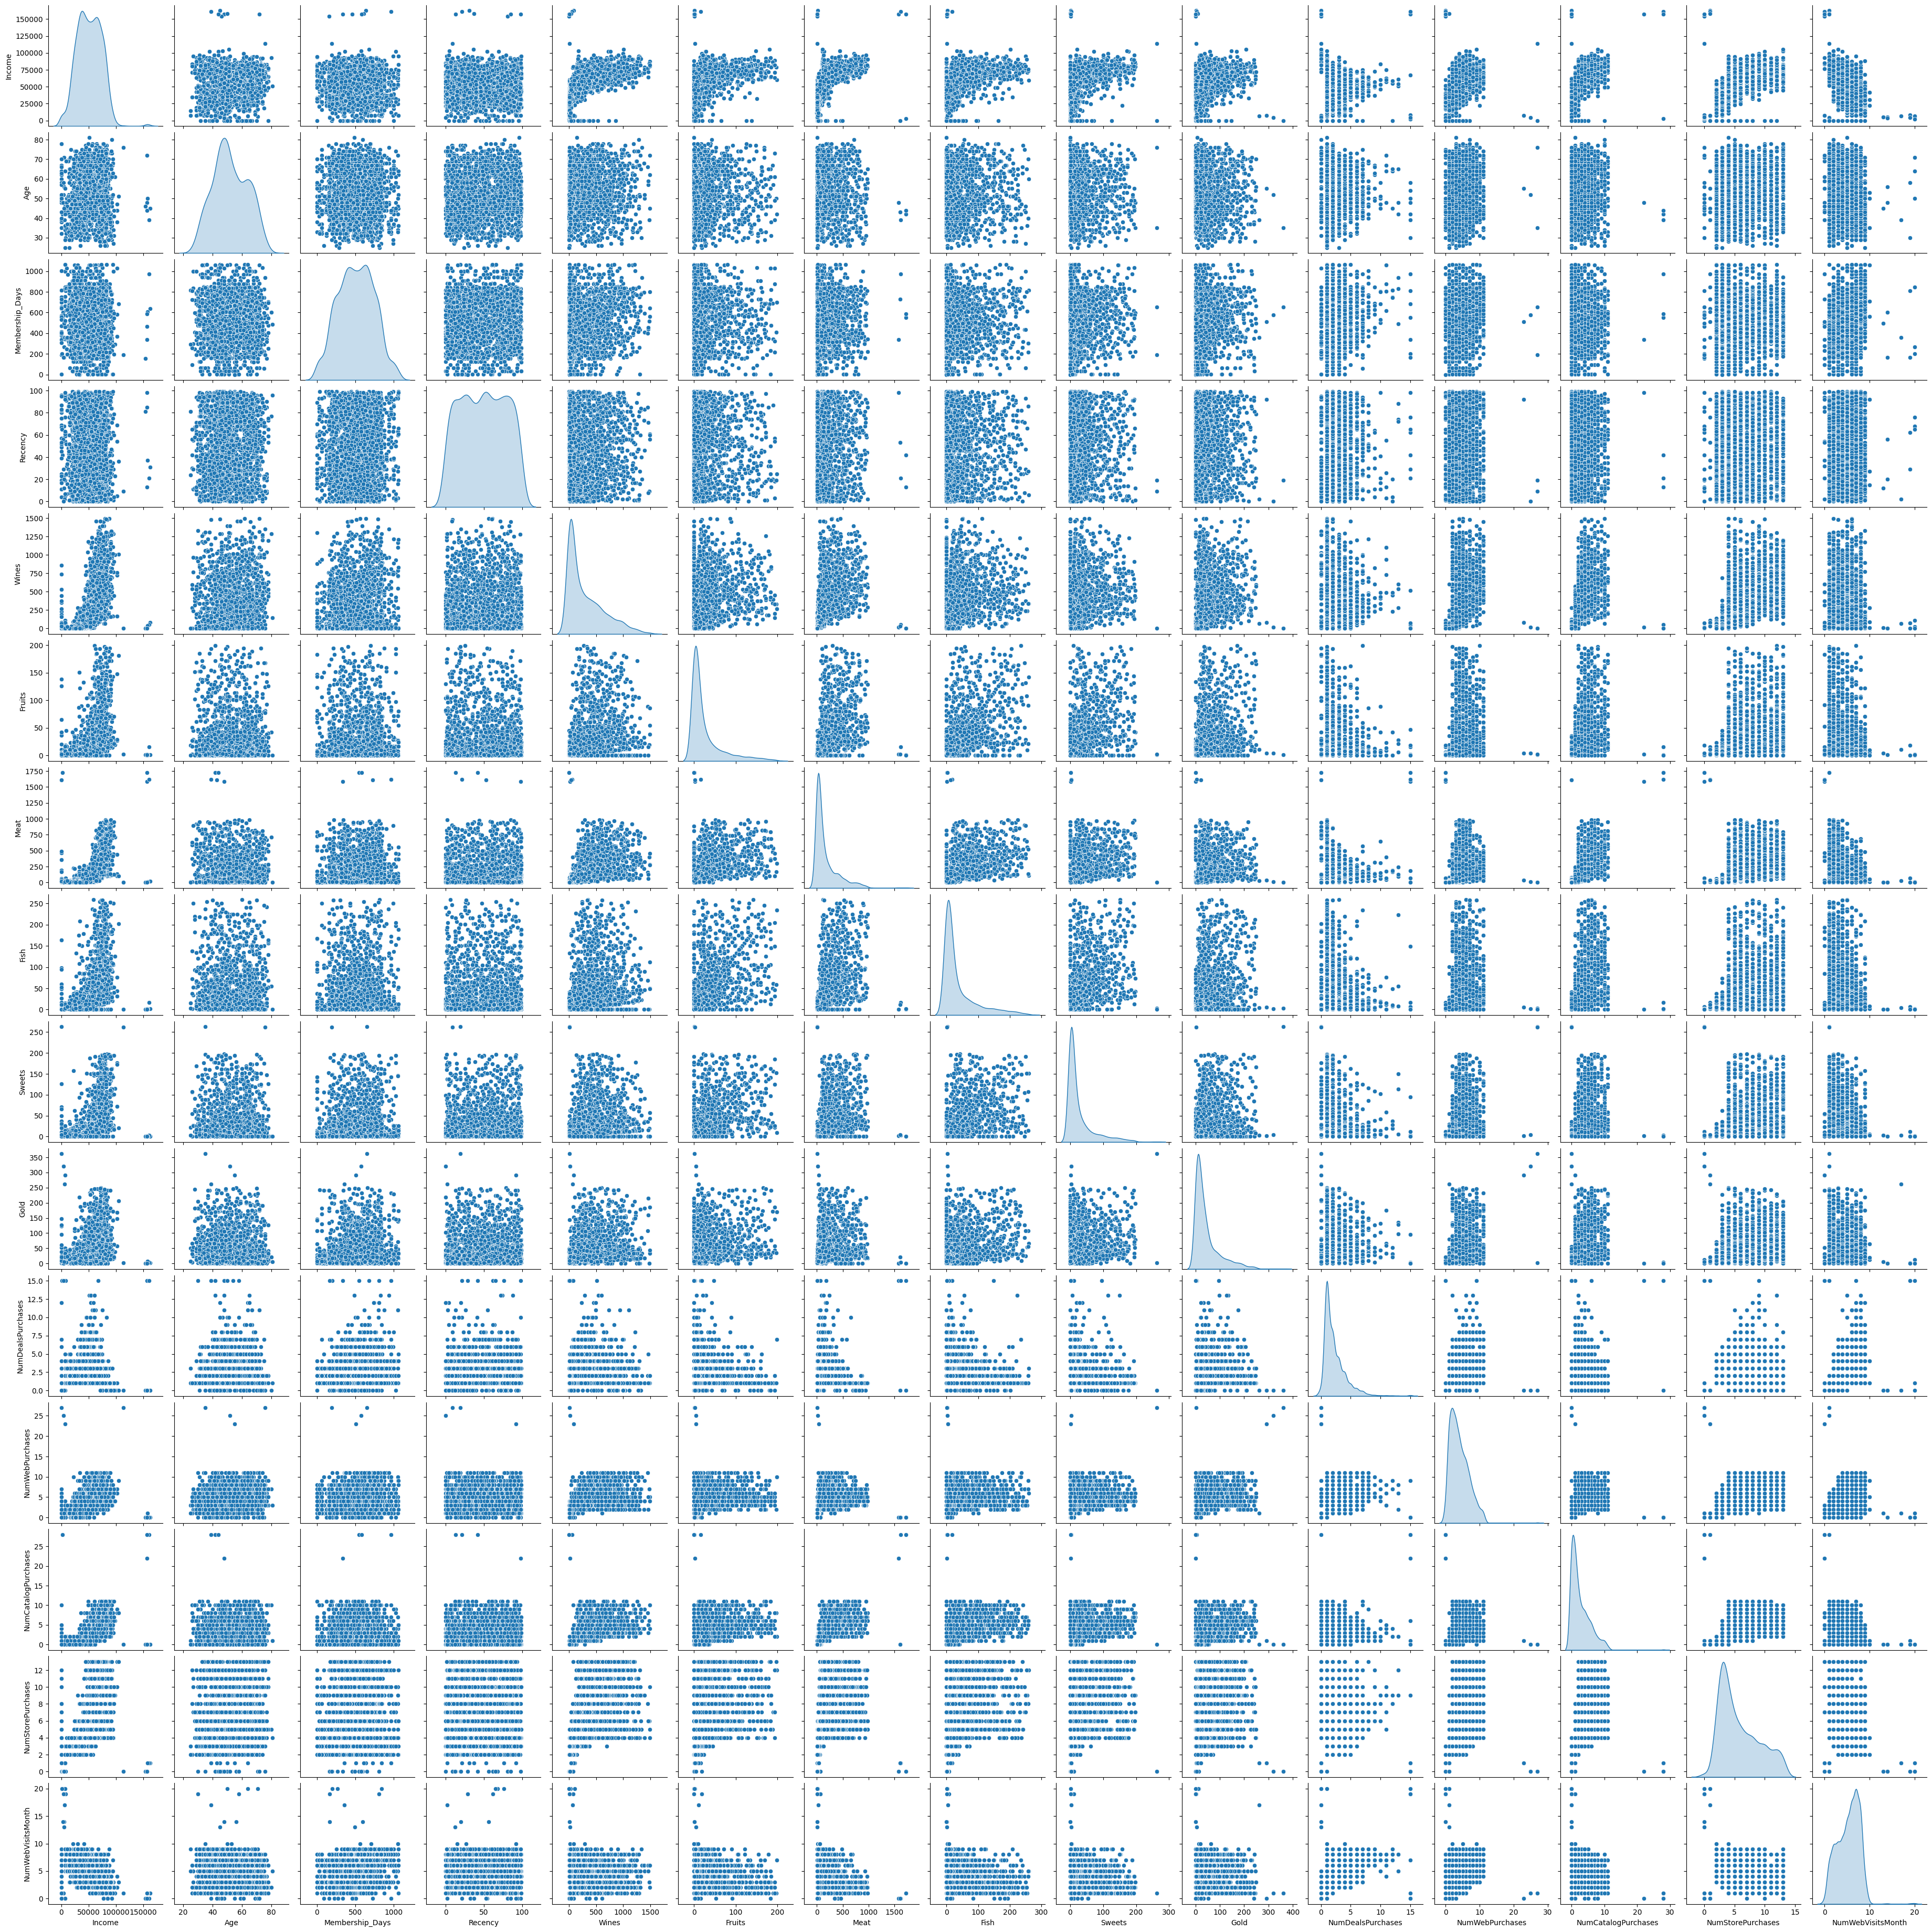

In [18]:
pp_features_df = ['Income', 'Age', 'Membership_Days', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
sns.pairplot(data=customer_info_df[pp_features_df], diag_kind='kde')

In [19]:
customer_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2236 non-null   object 
 1   Marital_Status       2236 non-null   object 
 2   Income               2236 non-null   float64
 3   Recency              2236 non-null   int64  
 4   Wines                2236 non-null   int64  
 5   Fruits               2236 non-null   int64  
 6   Meat                 2236 non-null   int64  
 7   Fish                 2236 non-null   int64  
 8   Sweets               2236 non-null   int64  
 9   Gold                 2236 non-null   int64  
 10  NumDealsPurchases    2236 non-null   int64  
 11  NumWebPurchases      2236 non-null   int64  
 12  NumCatalogPurchases  2236 non-null   int64  
 13  NumStorePurchases    2236 non-null   int64  
 14  NumWebVisitsMonth    2236 non-null   int64  
 15  AcceptedCmp3         2236 non-null   i

#### Non-Parametric Correlation Analysis

Use the Spearman correlation to detect a monotonic relationship between variables, meaning that the direction of the relationship is consistent but not necessarily linear.
- R ->  1   : Strong positive monotonic relationship
- R = 0     : No monotonic correlation
- R -> -1   : Strong negative monotonic relationship

Text(0.5, 1.0, 'Spearman Correlation Matrix')

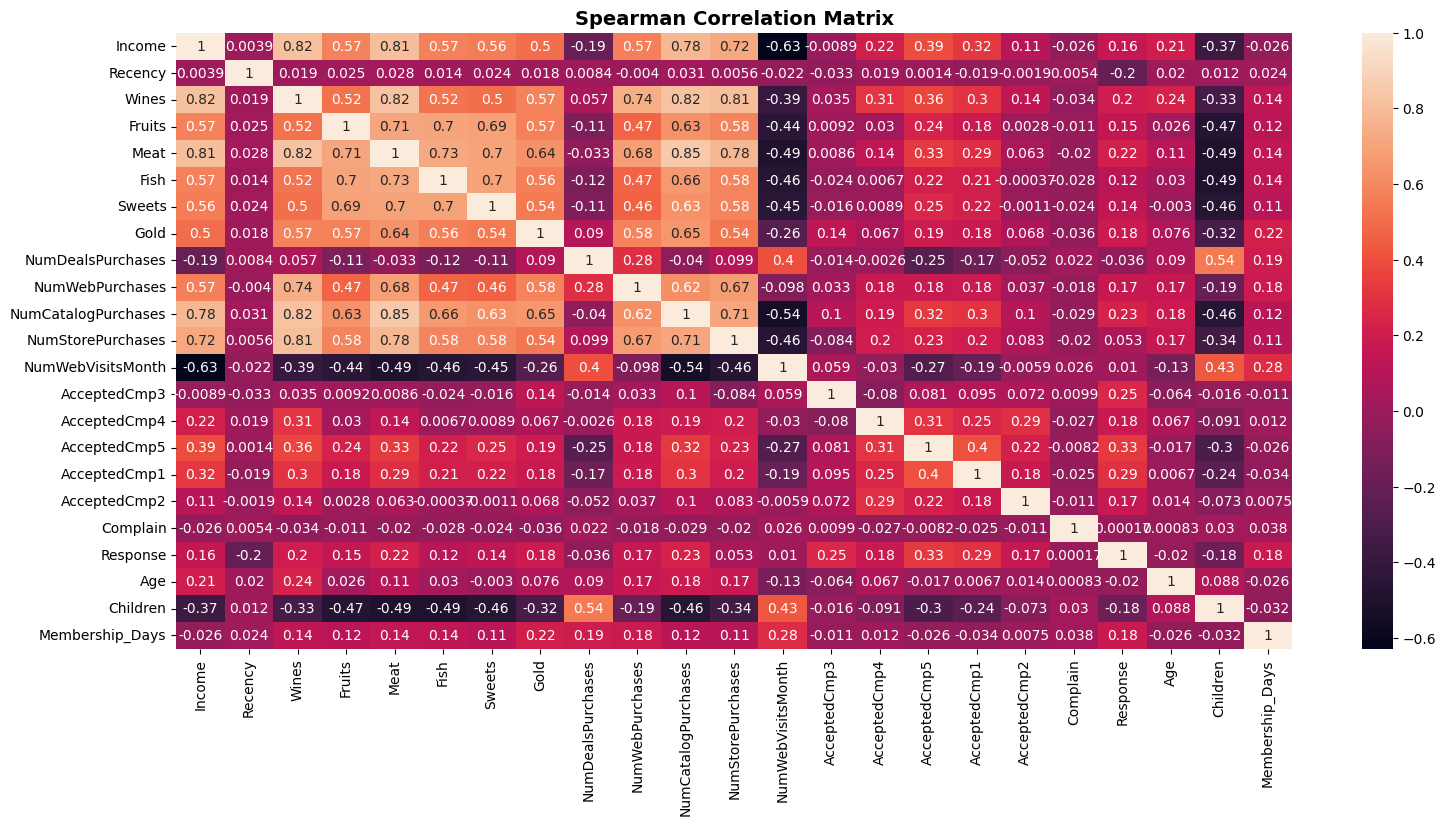

In [20]:
spearmancorr = customer_info_df.corr(method='spearman')

plt.figure(figsize = (18, 8))
sns.heatmap(spearmancorr, xticklabels=spearmancorr.columns, yticklabels=spearmancorr.columns, annot=True)
plt.title('Spearman Correlation Matrix', fontsize=14, fontweight='bold')

### Converting Categorical Features to Dummy Indicators

Get all categorical features, then transform them into binary dummy variables where the value is 0 (representing No) or 1 (representing Yes).

In [21]:
categorical_columns = [name for name in customer_info_df.columns if customer_info_df[name].dtype=='O']

print(f'There are {len(categorical_columns)} categorical features:\n')
print(", ".join(categorical_columns))

There are 2 categorical features:

Education, Marital_Status


In [22]:
customer_info_df_dummy = pd.get_dummies(data=customer_info_df, columns=categorical_columns)
customer_info_df_dummy.head(5)

Income  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
0  58138.0       58    635      88   546   172      88    88   
1  46344.0       38     11       1     6     2       1     6   
2  71613.0       26    426      49   127   111      21    42   
3  26646.0       26     11       4    20    10       3     5   
4  58293.0       94    173      43   118    46      27    15   

   NumDealsPurchases  NumWebPurchases  ...  Membership_Days  \
0                  3                8  ...              971   
1                  2                1  ...              125   
2                  1                8  ...              472   
3                  2                2  ...               65   
4                  5                5  ...              321   

   Education_Graduate  Education_Master  Education_PhD  \
0                   1                 0              0   
1                   1                 0              0   
2                   1                 0              0   
3                   1                 0              0   
4                   0                 0              1   

   Education_Undergraduate  Marital_Status_Divorced  Marital_Status_Married  \
0                        0                        0                       0   
1                        0                        0                       0   
2                        0                        0                       0   
3                        0                        0                       0   
4                        0                        0                       1   

   Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  
0                      1                        0                     0  
1                      1                        0                     0  
2                      0                        1                     0  
3                      0                        1                     0  
4                      0                        0                     0  

[5 rows x 32 columns]

After the conversion, the target features have expanded from the original 25 columns to a total of 36 columns.

In [23]:
customer_info_df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Income                   2236 non-null   float64
 1   Recency                  2236 non-null   int64  
 2   Wines                    2236 non-null   int64  
 3   Fruits                   2236 non-null   int64  
 4   Meat                     2236 non-null   int64  
 5   Fish                     2236 non-null   int64  
 6   Sweets                   2236 non-null   int64  
 7   Gold                     2236 non-null   int64  
 8   NumDealsPurchases        2236 non-null   int64  
 9   NumWebPurchases          2236 non-null   int64  
 10  NumCatalogPurchases      2236 non-null   int64  
 11  NumStorePurchases        2236 non-null   int64  
 12  NumWebVisitsMonth        2236 non-null   int64  
 13  AcceptedCmp3             2236 non-null   int64  
 14  AcceptedCmp4            

### Standardizing the Numerical Features

Transform numerical data to a standardized form by scaling them to have a mean of 0 and a standard deviation of 1. The purpose of standardization is to ensure that all features are on a similar scale and have equal importance in determining the output variable.

In [24]:
scaler = StandardScaler()
scaler.fit(customer_info_df_dummy)

customer_info_df_scaled = pd.DataFrame(scaler.transform(customer_info_df_dummy), columns=customer_info_df_dummy.columns)
customer_info_df_scaled.head(5)

Income   Recency     Wines    Fruits      Meat      Fish    Sweets  \
0  0.305306  0.306856  0.983228  1.554170  1.679746  2.461068  1.475396   
1 -0.229181 -0.383971 -0.871064 -0.636431 -0.713455 -0.650414 -0.631638   
2  0.915974 -0.798467  0.362159  0.572177 -0.177201  1.344595 -0.147262   
3 -1.121867 -0.798467 -0.871064 -0.560893 -0.651409 -0.503991 -0.583200   
4  0.312331  1.550344 -0.389661  0.421101 -0.217088  0.154911 -0.001950   

       Gold  NumDealsPurchases  NumWebPurchases  ...  Membership_Days  \
0  0.845669           0.348738         1.407639  ...         1.975467   
1 -0.729742          -0.168700        -1.110921  ...        -1.667017   
2 -0.038098          -0.686137         1.407639  ...        -0.172996   
3 -0.748954          -0.168700        -0.751127  ...        -1.925349   
4 -0.556831           1.383614         0.328256  ...        -0.823131   

   Education_Graduate  Education_Master  Education_PhD  \
0            0.992870         -0.585613      -0.526293   
1            0.992870         -0.585613      -0.526293   
2            0.992870         -0.585613      -0.526293   
3            0.992870         -0.585613      -0.526293   
4           -1.007181         -0.585613       1.900081   

   Education_Undergraduate  Marital_Status_Divorced  Marital_Status_Married  \
0                -0.157315                -0.339429               -0.793560   
1                -0.157315                -0.339429               -0.793560   
2                -0.157315                -0.339429               -0.793560   
3                -0.157315                -0.339429               -0.793560   
4                -0.157315                -0.339429                1.260144   

   Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  
0               1.897583                -0.590434             -0.188851  
1               1.897583                -0.590434             -0.188851  
2              -0.526986                 1.693668             -0.188851  
3              -0.526986                 1.693668             -0.188851  
4              -0.526986                -0.590434             -0.188851  

[5 rows x 32 columns]

### Creating a Model

### Evaluating the Model

### Making Test Prediction

### References

1. https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis
2. https://neptune.ai/blog/customer-segmentation-using-machine-learning
3. https://towardsdatascience.com/11-dimensionality-reduction-techniques-you-should-know-in-2021-dcb9500d388b
4. https://towardsdatascience.com/how-to-perform-kmeans-clustering-using-python-7cc296cec092

> BDM-1034 Winter 2023 Finals Project (Group 7)